In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Add a feature to distinguish wine types
red_wine["wine_type"] = 0  # 0 for red wine
white_wine["wine_type"] = 1  # 1 for white wine

# Combine datasets
wine_data = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

# Define features and target
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.3215
Classification Report:
               precision    recall  f1-score   support

           3       0.09      0.33      0.14         6
           4       0.30      0.19      0.23        43
           5       0.52      0.42      0.46       428
           6       0.45      0.35      0.39       567
           7       0.25      0.12      0.17       216
           8       0.06      0.05      0.05        39
           9       0.00      1.00      0.01         1

    accuracy                           0.32      1300
   macro avg       0.24      0.35      0.21      1300
weighted avg       0.42      0.32      0.36      1300



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

[I 2025-02-24 06:31:19,258] A new study created in memory with name: no-name-eb8bed7f-ace6-48e9-8481-b40e913739f7
[I 2025-02-24 06:31:19,269] Trial 0 finished with value: 0.33 and parameters: {'var_smoothing': 1.413915384953154e-08}. Best is trial 0 with value: 0.33.
[I 2025-02-24 06:31:19,277] Trial 1 finished with value: 0.3507692307692308 and parameters: {'var_smoothing': 2.0289944206637567e-06}. Best is trial 1 with value: 0.3507692307692308.
[I 2025-02-24 06:31:19,285] Trial 2 finished with value: 0.34615384615384615 and parameters: {'var_smoothing': 2.716678841703163e-07}. Best is trial 1 with value: 0.3507692307692308.
[I 2025-02-24 06:31:19,293] Trial 3 finished with value: 0.33 and parameters: {'var_smoothing': 1.4327068327293367e-08}. Best is trial 1 with value: 0.3507692307692308.
[I 2025-02-24 06:31:1

Best Hyperparameters: {'var_smoothing': 1e-05}
Accuracy with Best Model: 0.3577


[I 2025-02-24 06:31:19,470] Trial 19 finished with value: 0.3515384615384615 and parameters: {'var_smoothing': 2.7686170096205078e-06}. Best is trial 15 with value: 0.3569230769230769.
[I 2025-02-24 06:31:19,482] Trial 20 finished with value: 0.32384615384615384 and parameters: {'var_smoothing': 2.5708270846826175e-09}. Best is trial 15 with value: 0.3569230769230769.
[I 2025-02-24 06:31:19,496] Trial 21 finished with value: 0.3553846153846154 and parameters: {'var_smoothing': 7.664264498362445e-06}. Best is trial 15 with value: 0.3569230769230769.
[I 2025-02-24 06:31:19,509] Trial 22 finished with value: 0.3576923076923077 and parameters: {'var_smoothing': 9.969170251047981e-06}. Best is trial 22 with value: 0.3576923076923077.
[I 2025-02-24 06:31:19,523] Trial 23 finished with value: 0.3523076923076923 and parameters: {'var_smoothing': 3.22429621604177e-06}. Best is trial 22 with value: 0.3576923076923077.
[I 2025-02-24 06:31:19,536] Trial 24 finished with value: 0.34923076923076923 

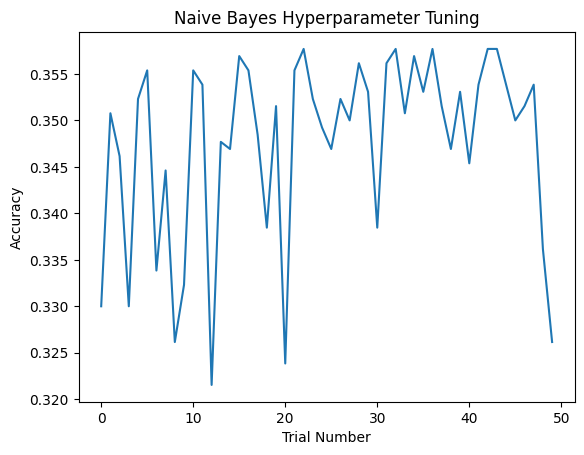

In [18]:
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, make_scorer

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a scorer for GridSearchCV (using accuracy)
scoring = make_scorer(accuracy_score)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Model: {accuracy_best:.4f}")

def objective(trial):
    var_smoothing = trial.suggest_float("var_smoothing", 1e-9, 1e-5, log=True)
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50)

# Get optimization history data
trials = study.trials_dataframe()

# Extract trial numbers and accuracy values
trial_numbers = trials['number']
accuracy_values = trials['value']

# Plot the line graph
plt.plot(trial_numbers, accuracy_values)
plt.xlabel('Trial Number')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Hyperparameter Tuning')
plt.show()



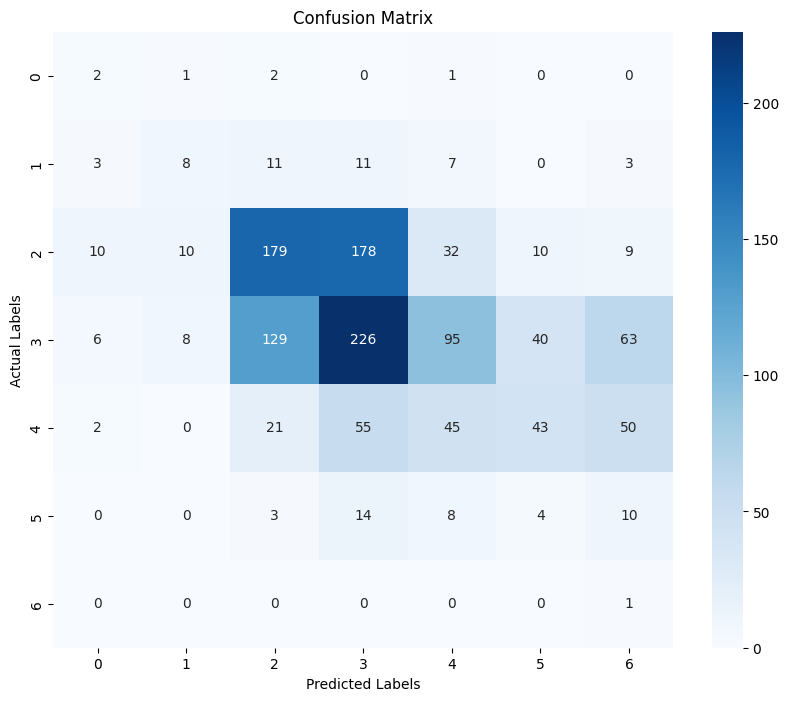

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()